### Cleaning and EDA of train and test data

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')

#### Understanding our train and test datasets

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [37]:
train.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


In [38]:
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [40]:
test.head(3)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [41]:
test.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

There are about 10,000 rows in train, and about 116,000 rows in test. There are no null values in both train and test data. 

There are two additional columns in train compared to test; they are 'NumMosquitos' and 'WnvPresent'. 

There is one additional column in test compared to train; this is the 'Id' column which is an index column that can be removed. 

For both the test and train datasets, we will:
- remove columns relating to address since the longitude and latitude are sufficient in pinpointing locations
- convert all column names to lowercase for easier reference
- convert data to day of week, month, and year
- convert categorical variables to dummies (one-hot encoding) for processing by model later

### Cleaning combined train and test datasets

In [42]:
#dropping unnecessary address columns from train data
train.drop(columns=['Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy'], inplace=True)

#confirming new number of rows and columns
train.shape

(10506, 7)

In [43]:
#dropping unnecessary address columns from test data
test.drop(columns=['Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy'], inplace=True)

#confirming new number of rows and columns
test.shape

(116293, 6)

In [44]:
#combining train and test data and confirming new number of rows and columns
combined = pd.concat([train, test])
combined.shape

(126799, 8)

In [45]:
#converting all column names to lowercase for easier reference
combined.columns = combined.columns.map(lambda x: x.lower())

In [46]:
#converting date to day, month and year
combined.date = pd.to_datetime(combined.date)
combined['month']=combined['date'].apply(lambda x: x.to_pydatetime().month)
combined['year']=combined['date'].apply(lambda x: x.to_pydatetime().year)
combined['day_of_week']=combined['date'].apply(lambda x: x.to_pydatetime().weekday())
combined['day']=combined['date'].apply(lambda x: x.to_pydatetime().day)

In [47]:
#converting categorical variables to dummies
combined=pd.get_dummies(combined,columns=['species', 'trap'],drop_first=True)    

In [48]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126799 entries, 0 to 116292
Columns: 165 entries, date to trap_T903
dtypes: datetime64[ns](1), float64(5), int64(4), uint8(155)
memory usage: 29.4 MB


In [49]:
combined.head(1)

,date,latitude,longitude,nummosquitos,wnvpresent,id,month,year,day_of_week,day,...,trap_T231,trap_T232,trap_T233,trap_T234,trap_T235,trap_T236,trap_T237,trap_T238,trap_T900,trap_T903
0,2007-05-29,41.95469,-87.800991,1.0,0.0,NaN,5,2007,1,29,...,0,0,0,0,0,0,0,0,0,0


#### Splitting train and test datasets

We will split up the combined datasets back into train and test datasets so that we can perform EDA on the unique train datasets which contains columns 'nummosquitos' and 'wnvpresent'. This will help us to understand the spread of the virus better. 

In [50]:
#Dividing back into test and train dataset
train = combined.loc[combined['wnvpresent'] >= 0]
test = combined.loc[combined['wnvpresent'].isnull()]

In [51]:
#removing 'nummosquitos' and 'wnvpresent' columns from test datasets...
#since they are not supposed to be there but was added during concatenation
test.drop(['nummosquitos', 'wnvpresent'], axis = 1, inplace=True)
train.drop(['id'], axis = 1, inplace=True)

C:\Users\elton\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
#confirming that we have the right number of rows and columns in the train and test sets
print(train.shape, test.shape)

(10506, 164) (116293, 163)


In [53]:
#changing 'id' back to 'Id' to fit submission requirement
test.rename(columns={'id': 'Id'}, inplace=True)

C:\Users\elton\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
train.to_csv('../data/train_cleaned.csv')
test.to_csv('../data/test_cleaned.csv')

### Exploratory Data Analysis

#### Visualising relationship between number of mosquitos and presence of WNV

The more mosquitos in the trap, the more likely there will be a mosquito with WNV.

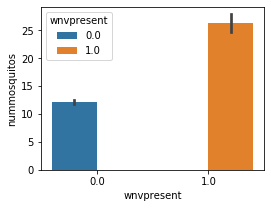

In [55]:
plt.subplots(figsize=(4,3))
ax=sns.barplot('wnvpresent','nummosquitos',data=train,hue='wnvpresent')

#### Visualising which mosquito carries WNV

WNV is only transmitted by Culex Pipiens and Culex Restuans.

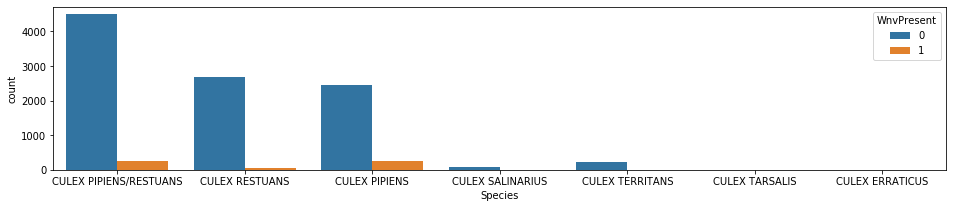

In [56]:
train1=pd.read_csv('../data/train.csv')

plt.subplots(figsize=(16,3))
ax2=sns.countplot('Species',data=train1,hue='WnvPresent')

#### Visualising which month and year had the most number of mosquitos

Number of mosquitoes peaked in June and reduced from there. 
2007 had the highest number of mosquitoes.

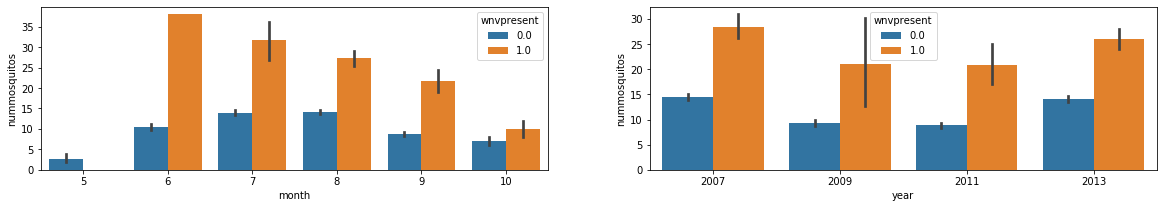

In [57]:
plt.subplots(figsize=(20,3))
plt.subplot(1,2,1),sns.barplot('month','nummosquitos',data=train,hue='wnvpresent')  
ax2=plt.subplot(1,2,2),sns.barplot('year','nummosquitos',data=train,hue='wnvpresent')

#### Visualising spread of virus spatially

In 2007, the first occurrences of WNV appeared in the south of Chicago in July. By August, WNV can be found throughout Chicago. The occurrence of WNV began to subside in September, and was greatly reduced by October. 

In [58]:
# EDA function, visualization of where and when collections and viruses occured:

def pltloglat(period,yearr=2007):
    if period=='month':
        period=['May','June','July', 'August','September','October']
    if period=='year':
        period=[2007,2009,2011,2013]
    DATA=train
    fig,ax = plt.subplots(nrows=1,ncols=len(period), sharey=True)
    if len(period)==6:
        fig.set_size_inches(15, 4)
        print('Year -',yearr)
    elif len(period)==4:
        fig.set_size_inches(15, 5)        
    for ii,ob in enumerate(period):
        if len(period)==6: 
            train_0=DATA[(DATA['year']==yearr)&(DATA['wnvpresent']==0)&(DATA['month']==ii+5)]
            train_1=DATA[(DATA['year']==yearr)&(DATA['wnvpresent']==1)&(DATA['month']==ii+5)]
        elif len(period)==4:
            train_0=DATA[(DATA['year']==period[ii])&(DATA['wnvpresent']==0)]
            train_1=DATA[(DATA['year']==period[ii])&(DATA['wnvpresent']==1)]   
        ax[ii].set_title(ob)
        ax[ii].set_xlim([-88.0,-87.5])
        sns.regplot('longitude','latitude',data=train_0,fit_reg=False,ax=ax[ii],color='steelblue')
        sns.regplot('longitude','latitude',data=train_1,fit_reg=False,ax=ax[ii],color='orange',marker='+',)

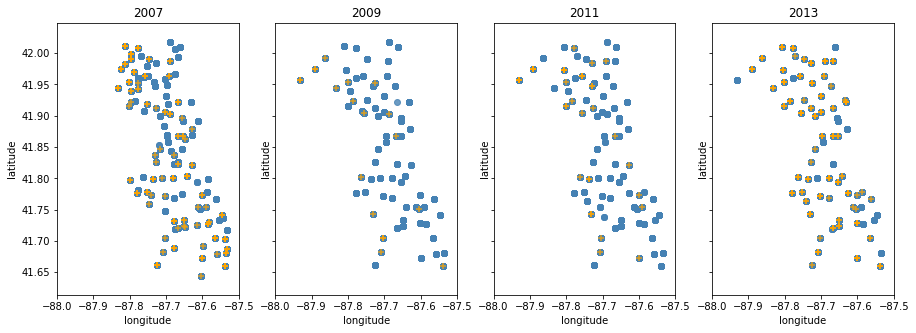

In [59]:
#visualising spread of virus across years in train dataset

pltloglat('year')

Year - 2007


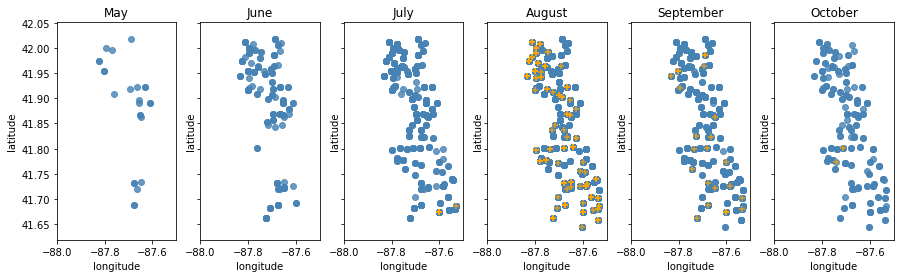

In [60]:
#visualising spread of virus across months in 2007

pltloglat('month')

Year - 2009


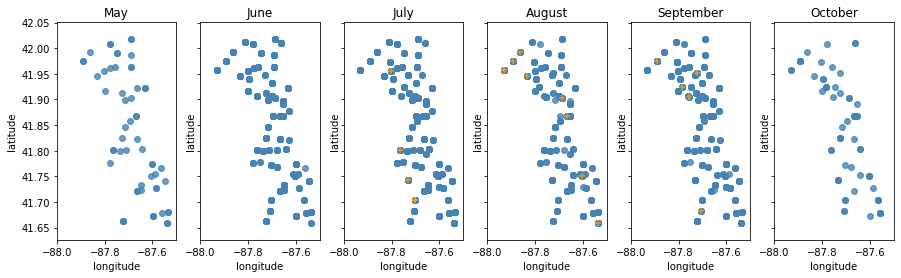

In [61]:
#visualising spread of virus across months in 2009

pltloglat('month', yearr=2009)